In [18]:
!pip install matplotlib
!pip install altair
!pip install vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [1]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,BooleanType
import pyspark.sql.functions as F

In [112]:
df_fire_delta_table = (
    spark
    .read.format("delta")
    .load("/tmp/data/1_0_assignment/tables/fire_calls")
)

df_fire_delta_table.count()

6256076

In [57]:
df_law_enf_delta_table = (
    spark
    .read.format("delta")
    .load("/tmp/data/1_0_assignment/tables/law_enf_calls")
)

df_law_enf_delta_table.count()

5202343

   Team  Agression  Alarm  Medical incident  Intrusion
0  2018         10     20                10         26
1  2019         20     25                15         21
2  2020         12     15                19          6
3  2021         10     18                11         19


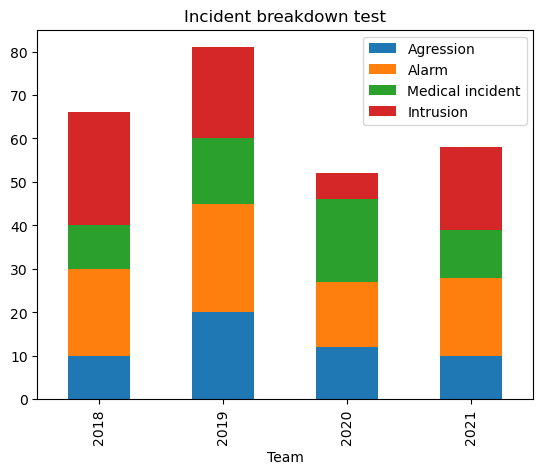

In [2]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
df = pd.DataFrame([['2018', 10, 20, 10, 26], ['2019', 20, 25, 15, 21], ['2020', 12, 15, 19, 6],
                   ['2021', 10, 18, 11, 19]],
                  columns=['Team', 'Agression', 'Alarm', 'Medical incident', 'Intrusion'])
# view data
print(df)
 
# plot data in stack manner of bar type
df.plot(x='Team', kind='bar', stacked=True,
        title='Incident breakdown test')
plt.show()


**Breakdown the dataset for Fire calls by call type and start ranking them**

In [64]:
from pyspark.sql.window import Window

windowsSpec=Window.partitionBy('year').orderBy(F.desc('count'))
df2 = df_fire_delta_table.select(F.col('call_type'),F.year(F.to_timestamp('received_dt_time', 'MM/dd/yyyy hh:mm:ss a')).alias('year')).\
            groupBy('call_type','year').count()
df3 = df2.withColumn('rank',F.rank().over(windowsSpec)).where('rank <= 4').show()
display(df3)

+--------------------+----+------+----+
|           call_type|year| count|rank|
+--------------------+----+------+----+
|    Medical Incident|2000|100863|   1|
|      Structure Fire|2000| 27663|   2|
|              Alarms|2000| 17139|   3|
|Citizen Assist / ...|2000|  3240|   4|
|    Medical Incident|2001|135026|   1|
|      Structure Fire|2001| 42774|   2|
|              Alarms|2001| 23843|   3|
|               Other|2001|  4969|   4|
|    Medical Incident|2002|143052|   1|
|      Structure Fire|2002| 41896|   2|
|              Alarms|2002| 22765|   3|
|               Other|2002|  5634|   4|
|    Medical Incident|2003|143754|   1|
|      Structure Fire|2003| 42698|   2|
|              Alarms|2003| 26055|   3|
|   Traffic Collision|2003|  9542|   4|
|    Medical Incident|2004|146121|   1|
|      Structure Fire|2004| 35526|   2|
|              Alarms|2004| 26553|   3|
|   Traffic Collision|2004|  9895|   4|
+--------------------+----+------+----+
only showing top 20 rows



None

In [29]:
df_fire_delta_table.select('neighbourhoods').distinct().show(truncate=False)

+------------------------------+
|neighbourhoods                |
+------------------------------+
|Inner Sunset                  |
|Haight Ashbury                |
|Lincoln Park                  |
|Japantown                     |
|None                          |
|North Beach                   |
|Lone Mountain/USF             |
|Western Addition              |
|Bernal Heights                |
|Mission Bay                   |
|Hayes Valley                  |
|Financial District/South Beach|
|Lakeshore                     |
|Bayview Hunters Point         |
|Visitacion Valley             |
|Inner Richmond                |
|Nob Hill                      |
|Oceanview/Merced/Ingleside    |
|Outer Richmond                |
|Treasure Island               |
+------------------------------+
only showing top 20 rows



In [58]:
df_law_enf_delta_table.printSchema()

root
 |-- cad_number: string (nullable = true)
 |-- dup_cad_number: string (nullable = true)
 |-- pd_incident_report: string (nullable = true)
 |-- received_datetime: string (nullable = true)
 |-- entry_datetime: string (nullable = true)
 |-- dispatch_datetime: string (nullable = true)
 |-- enroute_datetime: string (nullable = true)
 |-- onscene_datetime: string (nullable = true)
 |-- close_datetime: string (nullable = true)
 |-- call_type_original: string (nullable = true)
 |-- call_type_original_desc: string (nullable = true)
 |-- call_type_original_notes: string (nullable = true)
 |-- call_type_final: string (nullable = true)
 |-- call_type_final_desc: string (nullable = true)
 |-- call_type_final_notes: string (nullable = true)
 |-- priority_original: string (nullable = true)
 |-- priority_final: string (nullable = true)
 |-- agency: string (nullable = true)
 |-- disposition: string (nullable = true)
 |-- onview_flag: string (nullable = true)
 |-- sensitive_call: string (nullable =

In [59]:
df_law_enf_delta_table.select('analysis_neighborhood').distinct().show(200,truncate=False)

+------------------------------+
|analysis_neighborhood         |
+------------------------------+
|Inner Sunset                  |
|Haight Ashbury                |
|Lincoln Park                  |
|Japantown                     |
|North Beach                   |
|Lone Mountain/USF             |
|Western Addition              |
|Bernal Heights                |
|Mission Bay                   |
|Hayes Valley                  |
|null                          |
|Lakeshore                     |
|Financial District/South Beach|
|Bayview Hunters Point         |
|Visitacion Valley             |
|Inner Richmond                |
|Nob Hill                      |
|Oceanview/Merced/Ingleside    |
|Outer Richmond                |
|Treasure Island               |
|Chinatown                     |
|Mission                       |
|Excelsior                     |
|Twin Peaks                    |
|Seacliff                      |
|Sunset/Parkside               |
|Presidio Heights              |
|Portola  

In [60]:
df_fire_delta_table.select('analysis_neighborhood').distinct().show(200,truncate=False)

+------------------------------+
|analysis_neighborhood         |
+------------------------------+
|Inner Sunset                  |
|Haight Ashbury                |
|Lincoln Park                  |
|Japantown                     |
|None                          |
|North Beach                   |
|Lone Mountain/USF             |
|Western Addition              |
|Bernal Heights                |
|Mission Bay                   |
|Hayes Valley                  |
|Financial District/South Beach|
|Lakeshore                     |
|Bayview Hunters Point         |
|Visitacion Valley             |
|Inner Richmond                |
|Nob Hill                      |
|Oceanview/Merced/Ingleside    |
|Outer Richmond                |
|Treasure Island               |
|Chinatown                     |
|Mission                       |
|Excelsior                     |
|Twin Peaks                    |
|Seacliff                      |
|Sunset/Parkside               |
|Presidio Heights              |
|Portola  

In [109]:
df_fire_001 = df_fire_delta_table.groupBy('analysis_neighborhood','year','call_type').count().\
        orderBy(F.desc('analysis_neighborhood'),F.desc('year'))

In [30]:
df_fire_001.show(truncate=False) 

+---------------------+-------------------------------+----+-----+
|analysis_neighborhood|call_type                      |year|count|
+---------------------+-------------------------------+----+-----+
|Western Addition     |Other                          |2011|95   |
|Western Addition     |Industrial Accidents           |2020|10   |
|Western Addition     |Structure Fire                 |2003|1738 |
|Western Addition     |HazMat                         |2000|7    |
|Western Addition     |Smoke Investigation (Outside)  |2000|5    |
|Western Addition     |Gas Leak (Natural and LP Gases)|2000|18   |
|Western Addition     |Smoke Investigation (Outside)  |2001|26   |
|Western Addition     |Electrical Hazard              |2020|15   |
|Western Addition     |Structure Fire                 |2005|1225 |
|Western Addition     |Medical Incident               |2002|5249 |
|Western Addition     |Alarms                         |2001|1448 |
|Western Addition     |Gas Leak (Natural and LP Gases)|2001|6 

In [86]:

from pyspark.sql.window import Window
windowsSpec=Window.partitionBy('analysis_neighborhood').orderBy(F.desc('count'))
df_fire_002 = df_fire_001.withColumn('rank',F.rank().over(windowsSpec)).where('rank <= 4')

In [89]:
df_fire_002.show(100,truncate=False)

+------------------------------+----+----------------+-----+----+
|analysis_neighborhood         |year|call_type       |count|rank|
+------------------------------+----+----------------+-----+----+
|Bayview Hunters Point         |2022|Medical Incident|11822|1   |
|Bayview Hunters Point         |2021|Medical Incident|11245|2   |
|Bayview Hunters Point         |2020|Medical Incident|11148|3   |
|Bayview Hunters Point         |2019|Medical Incident|11097|4   |
|Bernal Heights                |2022|Medical Incident|3662 |1   |
|Bernal Heights                |2021|Medical Incident|3486 |2   |
|Bernal Heights                |2017|Medical Incident|3429 |3   |
|Bernal Heights                |2004|Medical Incident|3408 |4   |
|Castro/Upper Market           |2017|Medical Incident|6063 |1   |
|Castro/Upper Market           |2018|Medical Incident|5738 |2   |
|Castro/Upper Market           |2019|Medical Incident|5564 |3   |
|Castro/Upper Market           |2016|Medical Incident|5391 |4   |
|Chinatown

In [19]:
import altair as alt
from vega_datasets import data
import pandas as pd

stocks = data.stocks()
source = stocks.groupby([pd.Grouper(key="date", freq="6M"),"symbol"]).mean().reset_index()

alt.Chart(source).mark_line(point=True).encode(
    x=alt.X("date:O").timeUnit("yearmonth").title("date"),
    y="rank:O",
    color=alt.Color("symbol:N")
).transform_window(
    rank="rank()",
    sort=[alt.SortField("price", order="descending")],
    groupby=["date"]
).properties(
    title="Bump Chart for Stock Prices",
    width=600,
    height=150,
)

alt.Chart(...)

**Call type and Neighbourhood mapping for Fire calls**

In [176]:
from pyspark.sql.window import Window
df_fire_001 = df_fire_delta_table.where(F.col('call_type').isNotNull()).where(F.col('analysis_neighborhood').isNotNull()).groupBy('analysis_neighborhood','call_type').count().\
        orderBy(F.desc('analysis_neighborhood'))

windowsSpec=Window.partitionBy('analysis_neighborhood','call_type').orderBy(F.desc('count'))
df_fire_002 = df_fire_001.withColumn('rank',F.rank().over(windowsSpec)).where('rank <= 5')
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
df_fire_00_pandas = df_fire_002.toPandas()
import altair as alt
alt.Chart(df_fire_00_pandas).mark_bar().encode(
    x='analysis_neighborhood',
    y='call_type',
    color='count',
).interactive()

alt.Chart(...)

In [179]:
df_law_enf_001 = df_law_enf_delta_table.where(F.col('call_type_final_desc').isNotNull()).where(F.col('analysis_neighborhood').isNotNull()).\
        groupBy('analysis_neighborhood','call_type_final_desc').count().\
        orderBy(F.desc('analysis_neighborhood'))
from pyspark.sql.window import Window
windowsSpec=Window.partitionBy('analysis_neighborhood','call_type_final_desc').orderBy(F.desc('count'))
df_law_enf_001 = df_law_enf_001.withColumn('rank',F.rank().over(windowsSpec)).where('rank <= 5')
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
df_law_enf_00_pandas = df_law_enf_001.toPandas()

import altair as alt
alt.Chart(df_law_enf_00_pandas).mark_bar().encode(
    x='analysis_neighborhood',
    y='call_type_final_desc',
    color='count',
).interactive()

alt.Chart(...)

**What neighbourhoods made the highest number of calls into the Fire department?**

In [208]:
df_fire_call_split = df_fire_delta_table.select("call_type","analysis_neighborhood")\
 .where(F.col("call_type").isNotNull())\
 .groupBy("analysis_neighborhood")\
 .count()\
 .orderBy("count", ascending=False).limit(10)

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
df_fire_call_split_pandas = df_fire_call_split.toPandas()
df_fire_call_split.show(truncate=False)
import altair as alt
alt.Chart(df_fire_call_split_pandas).mark_bar().encode(
    x='analysis_neighborhood',
    y='count',
    color='analysis_neighborhood',
).interactive()

+------------------------------+------+
|analysis_neighborhood         |count |
+------------------------------+------+
|Tenderloin                    |845105|
|South of Market               |611616|
|Mission                       |564249|
|Financial District/South Beach|416477|
|Bayview Hunters Point         |338928|
|Sunset/Parkside               |242305|
|Western Addition              |232273|
|Nob Hill                      |207237|
|Outer Richmond                |165923|
|Hayes Valley                  |154793|
+------------------------------+------+



alt.Chart(...)

**What neighbourhoods made the highest number of calls into Law Enforcement?**

In [209]:
df_law_enf_call_split = df_law_enf_delta_table.select("call_type_final_desc","analysis_neighborhood")\
 .where(F.col("call_type_final_desc").isNotNull())\
 .groupBy("analysis_neighborhood")\
 .count()\
 .orderBy("count", ascending=False).limit(10)
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
df_law_enf_call_split_pandas = df_law_enf_call_split.toPandas()
df_law_enf_call_split.show(truncate=False)
import altair as alt
alt.Chart(df_law_enf_call_split_pandas).mark_bar().encode(
    x='analysis_neighborhood',
    y='count',
    color='analysis_neighborhood',
).interactive()

+------------------------------+------+
|analysis_neighborhood         |count |
+------------------------------+------+
|Tenderloin                    |557460|
|Mission                       |524391|
|South of Market               |424162|
|Financial District/South Beach|419839|
|Bayview Hunters Point         |384528|
|Castro/Upper Market           |193169|
|Sunset/Parkside               |168215|
|Haight Ashbury                |155287|
|Outer Richmond                |139668|
|Nob Hill                      |133052|
+------------------------------+------+



alt.Chart(...)

**When was the highest number of calls made to fire department?**

In [196]:
df_fire_with_dates = df_fire_delta_table.select('analysis_neighborhood',"year",\
                                                F.to_date("received_dt_time", "MM/dd/yyyy hh:mm:ss a").alias('received_dt')).\
                                                where(F.col('received_dt_time').isNotNull())

In [221]:
df_fire_with_dates_001 = df_fire_with_dates.select('analysis_neighborhood','received_dt','year').groupBy('received_dt','year').count().orderBy(F.col('count').desc())
from pyspark.sql.window import Window
windowsSpec=Window.partitionBy('year').orderBy(F.desc('count'))
df_fire_with_dates_002 = df_fire_with_dates_001.withColumn('rank',F.rank().over(windowsSpec)).where('rank <= 2')
df_fire_with_dates_002.show(10)
df_fire_with_dates_002_pandas = df_fire_with_dates_002.toPandas()


+-----------+----+-----+----+
|received_dt|year|count|rank|
+-----------+----+-----+----+
| 2000-06-14|2000| 1307|   1|
| 2000-09-17|2000|  819|   2|
| 2001-05-04|2001|  866|   1|
| 2001-05-03|2001|  829|   2|
| 2002-11-07|2002| 1005|   1|
| 2002-12-14|2002|  990|   2|
| 2003-09-12|2003|  976|   1|
| 2003-06-26|2003|  973|   2|
| 2004-01-01|2004| 1010|   1|
| 2004-02-25|2004|  852|   2|
+-----------+----+-----+----+
only showing top 10 rows



In [167]:
df_law_enf_with_dates = df_law_enf_delta_table.select("*",F.to_date("received_datetime", "MM/dd/yyyy hh:mm:ss a").alias('received_dt')).where(F.col('received_datetime').isNotNull())

In [173]:
df_law_enf_with_dates.select('analysis_neighborhood','received_dt','year').groupBy('received_dt','year').count().orderBy(F.col('count').desc()).where('year == 2022').show(200,truncate=False)

+-----------+----+-----+
|received_dt|year|count|
+-----------+----+-----+
|2022-09-23 |2022|1802 |
|2022-09-09 |2022|1747 |
|2022-09-07 |2022|1740 |
|2022-09-08 |2022|1726 |
|2022-02-11 |2022|1719 |
|2022-10-29 |2022|1714 |
|2022-09-21 |2022|1712 |
|2022-10-28 |2022|1708 |
|2022-03-25 |2022|1700 |
|2022-02-07 |2022|1698 |
|2022-01-18 |2022|1692 |
|2022-11-11 |2022|1689 |
|2022-02-08 |2022|1686 |
|2022-03-17 |2022|1678 |
|2022-10-20 |2022|1673 |
|2022-09-06 |2022|1672 |
|2022-04-07 |2022|1668 |
|2022-03-22 |2022|1668 |
|2022-10-27 |2022|1660 |
|2022-09-20 |2022|1658 |
|2022-09-29 |2022|1654 |
|2022-11-15 |2022|1654 |
|2022-01-17 |2022|1648 |
|2022-03-15 |2022|1644 |
|2022-09-19 |2022|1641 |
|2022-09-14 |2022|1640 |
|2022-02-01 |2022|1638 |
|2022-01-22 |2022|1638 |
|2022-10-22 |2022|1633 |
|2022-11-04 |2022|1632 |
|2022-01-14 |2022|1632 |
|2022-04-04 |2022|1630 |
|2022-05-05 |2022|1627 |
|2022-11-18 |2022|1627 |
|2022-10-31 |2022|1625 |
|2022-04-01 |2022|1622 |
|2022-01-20 |2022|1618 |
